# EDA for lab data

### importing the data and calling the function to get data as type DataFrame

In [164]:
from taxipred.utils.constants import get_taxi_data

df = get_taxi_data()

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


### inspecting columns, range, type, nulls

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [166]:
df.shape

(1000, 11)

### Exploring values

In [167]:
df.describe(include="all")

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950,950,950.000000,950,950,950.000000,950.000000,950.000000,950.000000,951.000000
unique,NaN,4,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Afternoon,Weekday,NaN,Low,Clear,NaN,NaN,NaN,NaN,NaN
freq,NaN,371,655,NaN,397,667,NaN,NaN,NaN,NaN,NaN
mean,27.070547,NaN,NaN,2.476842,NaN,NaN,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,NaN,NaN,1.102249,NaN,NaN,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,NaN,NaN,1.000000,NaN,NaN,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,NaN,NaN,1.250000,NaN,NaN,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,NaN,NaN,2.000000,NaN,NaN,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,NaN,NaN,3.000000,NaN,NaN,4.260000,1.610000,0.390000,89.055000,69.099350


### Checking number of null values 

In [168]:
df.isna().sum().sort_values(ascending=False)

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

### Cleaning data



##### Test sorting the categorical columns. Create new value "Unspecified" for replacing NaN

In [169]:
categorical_cols = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Weather"]
df_cleaned = df
for col in categorical_cols:
    df_cleaned[col] = df[col].fillna("Unspecified")
    

In [170]:
df_cleaned.isna().sum().sort_values(ascending=False)

Trip_Distance_km         50
Base_Fare                50
Passenger_Count          50
Trip_Duration_Minutes    50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Price               49
Day_of_Week               0
Time_of_Day               0
Weather                   0
Traffic_Conditions        0
dtype: int64

In [171]:
import pandas as pd

# numeric columns
numeric_columns = df_cleaned.select_dtypes(include=["int64", "float64"]).columns

median_values = df_cleaned[numeric_columns].median()

# Fyll saknade värden med respektive kolumns median
df_cleaned = df_cleaned.fillna(median_values)


# # Fyll saknade värden med median
# for col in numeric_cols:
#     median_val = df[col].median()
#     df[col] = df[col].fillna(median_val)


In [172]:
df_cleaned.isna().sum().sort_values(ascending=False)

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

### Plotting some data for exploratory purpose

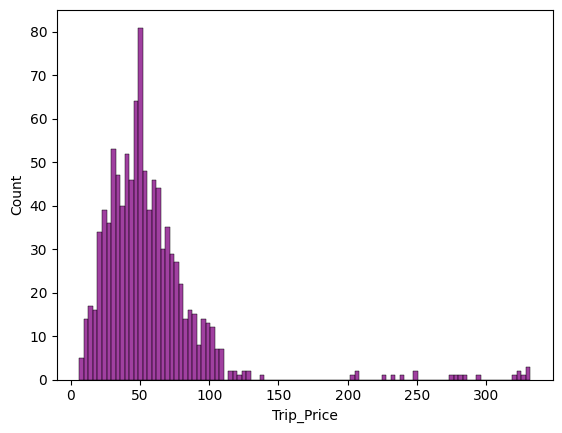

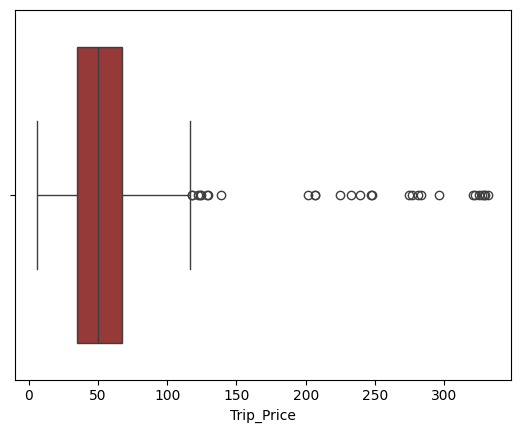

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_cleaned["Trip_Price"], bins=100, color="purple")
plt.show()

sns.boxplot(x=df_cleaned["Trip_Price"], color="brown")
plt.show()

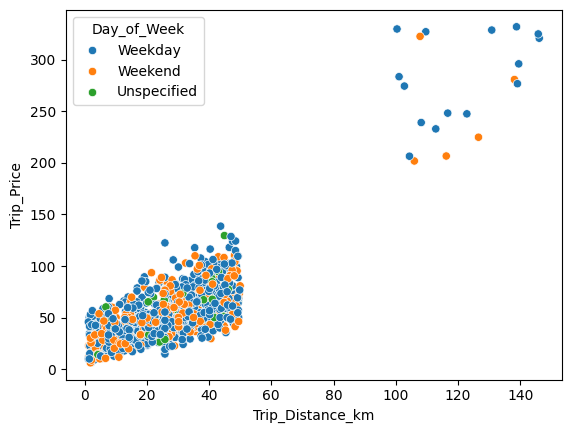

In [174]:
sns.scatterplot(data=df_cleaned, x="Trip_Distance_km", y="Trip_Price", hue="Day_of_Week")
plt.show()

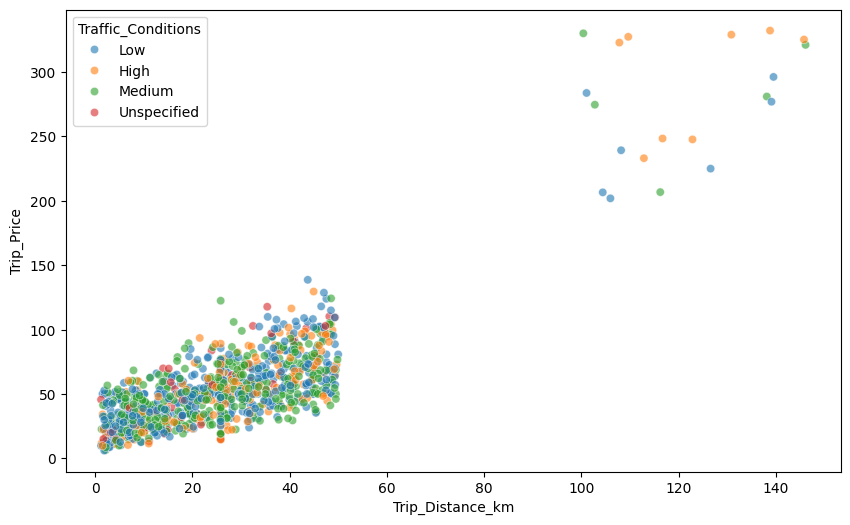

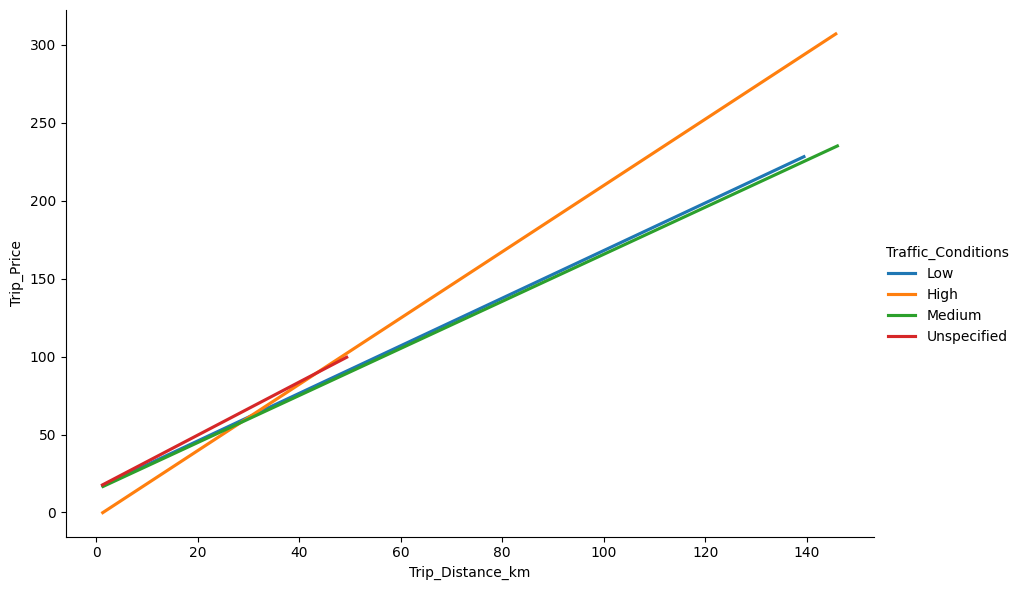

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_cleaned,
    x="Trip_Distance_km",
    y="Trip_Price",
    hue="Traffic_Conditions",
    alpha=0.6
)

sns.lmplot(
    data=df_cleaned,
    x="Trip_Distance_km",
    y="Trip_Price",
    hue="Traffic_Conditions", # "Weather",
    height=6,
    aspect=1.5,
    scatter=False,
    ci=None
)

plt.show()


### Splitting the data into target (trip_price) and features (columns)

In [176]:
X, y = df_cleaned.drop("Trip_Price", axis = "columns"), df_cleaned["Trip_Price"]
X.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.52,0.62,0.43,40.57
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27
3,30.33,Evening,Weekday,4.0,Low,Unspecified,3.48,0.51,0.15,116.81
4,25.83,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64


### Heatmap and correlationmap with source data

<Axes: >

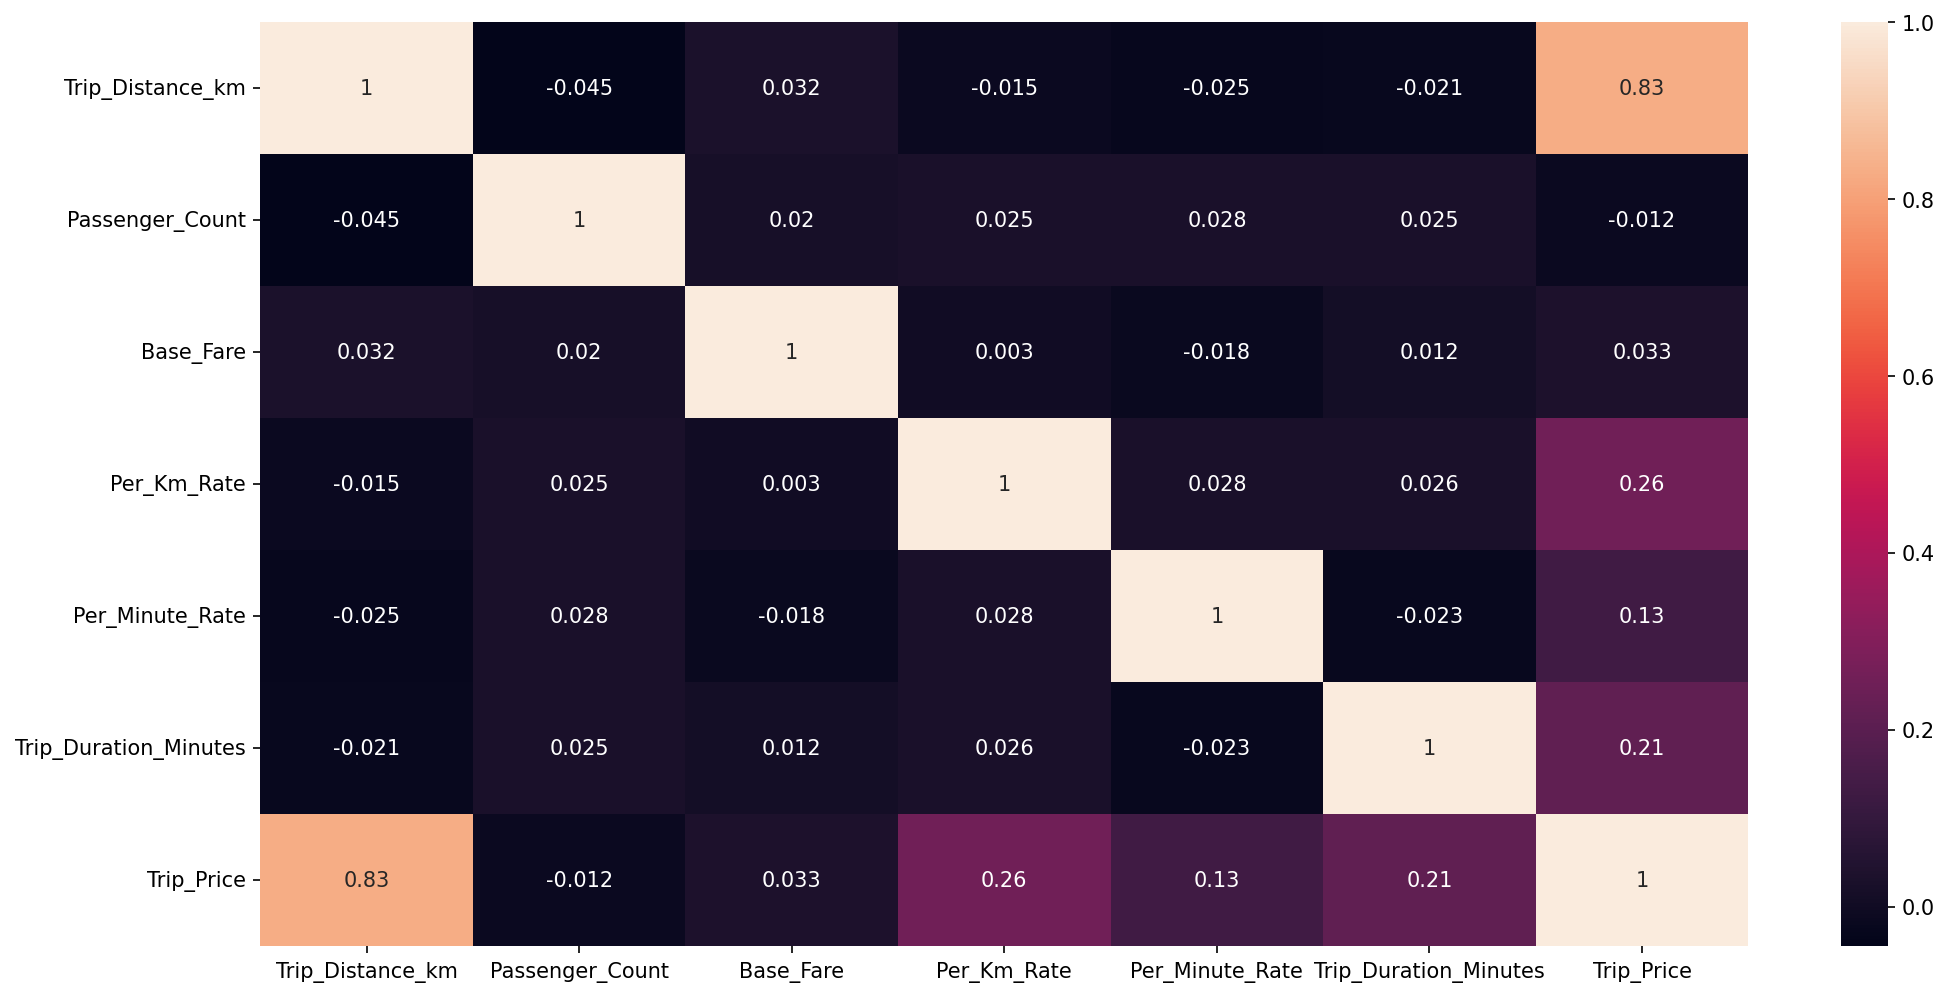

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(1, figsize=(16,8), dpi=150)

sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True)

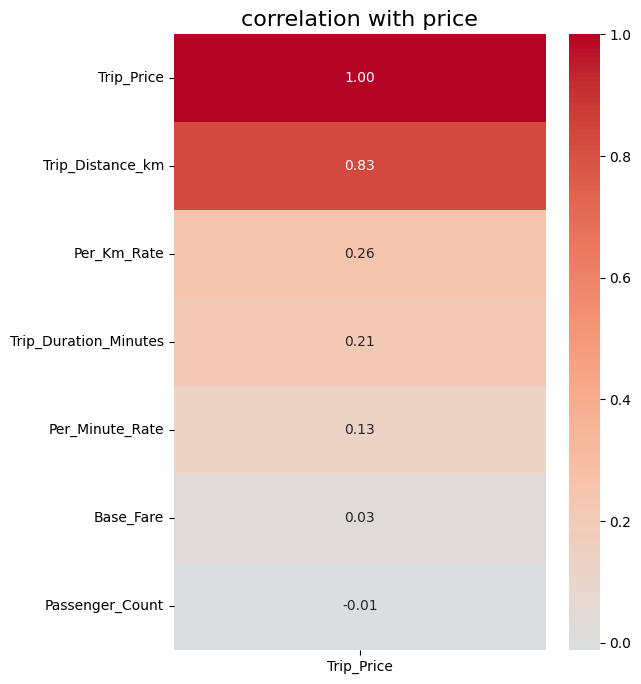

In [178]:
# merge X and y temporary
df_with_price = X.copy()
df_with_price["Trip_Price"] = y

# Calc correlations. sort by price
corr_price = df_with_price.corr(numeric_only=True)[["Trip_Price"]].sort_values(
    by="Trip_Price", ascending=False
)

# visualize
plt.figure(figsize=(6, 8))
sns.heatmap(corr_price, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("correlation with price", fontsize=16)
plt.show()

### Drop lesser correlating columns